## Q. WHO has hired you for working on the dataset of COVID-19. Aggregate data and within 2 days present your point of view to the joint commitee on strategic plannig to fight against COVID-19

## A. Present state analytics - India
## Allotted state - Maharashtra


In [444]:
import pandas as pd
import matplotlib.pyplot as plt   #importing required libraries
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [445]:
dateCols = ['Date']

data = pd.read_csv("covid-19.csv")

In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3711 non-null   int64 
 1   Date                      3711 non-null   object
 2   Time                      3711 non-null   object
 3   State/UnionTerritory      3711 non-null   object
 4   ConfirmedIndianNational   3711 non-null   object
 5   ConfirmedForeignNational  3711 non-null   object
 6   Cured                     3711 non-null   int64 
 7   Deaths                    3711 non-null   int64 
 8   Confirmed                 3711 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 261.1+ KB


In [447]:
data.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2


In [448]:
data_col = []

for col in data.columns:   #printing columns to eliminate column which is not necessay 
    data_col.append(col)
    
data_col

['Sno',
 'Date',
 'Time',
 'State/UnionTerritory',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

In [449]:
data.sample(5).isna()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
417,False,False,False,False,False,False,False,False,False
1868,False,False,False,False,False,False,False,False,False
3066,False,False,False,False,False,False,False,False,False
1969,False,False,False,False,False,False,False,False,False
2883,False,False,False,False,False,False,False,False,False


In [450]:
data.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True)
data #dropping unecessay columns

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3
...,...,...,...,...,...
3706,03/07/20,Tripura,1146,1,1435
3707,03/07/20,Uttarakhand,2405,42,2984
3708,03/07/20,Uttar Pradesh,17221,735,24825
3709,03/07/20,West Bengal,13037,699,19819


In [451]:
#sns.set(style='ticks')
#b = sns.pairplot(data)
#b.map(plt.plot)

In [487]:
temp = data["State/UnionTerritory"] == 'Maharashtra'
Maharashtra = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Tamil Nadu'
TamilNadu = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Delhi'
Delhi = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Gujarat'
Gujarat = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Uttar Pradesh'
UttarPradesh = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Rajasthan'
Rajasthan = data.loc[temp]



## Insight of top 5 States

## Maharashtra analysis

In [453]:
Maharashtra.Date[0:118:30]

76      09/03/20
757     08/04/20
1723    08/05/20
2757    07/06/20
Name: Date, dtype: object

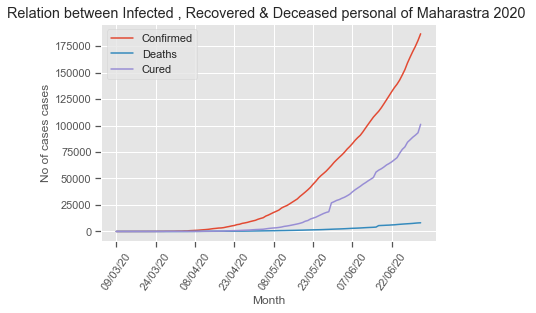

In [454]:
plt.style.use('ggplot')
plt.plot(Maharashtra.Date,Maharashtra.Confirmed,label="Confirmed")
plt.plot(Maharashtra.Date,Maharashtra.Deaths,label="Deaths")
plt.plot(Maharashtra.Date,Maharashtra.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of Maharastra 2020 ")
plt.xlabel("Month")
plt.ylabel("No of cases cases")
plt.xticks(Maharashtra.Date[0:118:15].tolist(),rotation=55)
plt.legend()
plt.show()

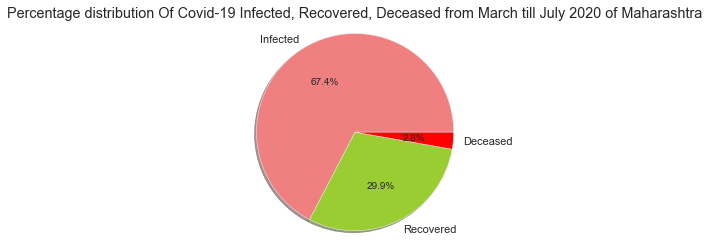

In [455]:
infected = sum(Maharashtra["Confirmed"])
deceased = sum(Maharashtra["Deaths"])
recovered = sum(Maharashtra["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19 Infected, Recovered, Deceased from March till July 2020 of Maharashtra")
plt.axis('equal')
plt.show()

## Tamil Nadu analysis

In [459]:
TamilNadu.Date[0:110:30]

61      07/03/20
703     06/04/20
1665    06/05/20
2695    05/06/20
Name: Date, dtype: object

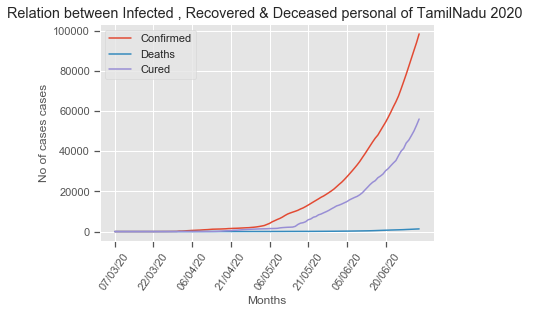

In [465]:
plt.style.use('ggplot')
plt.plot(TamilNadu.Date,TamilNadu.Confirmed,label="Confirmed")
plt.plot(TamilNadu.Date,TamilNadu.Deaths,label="Deaths")
plt.plot(TamilNadu.Date,TamilNadu.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of TamilNadu 2020 ")
plt.xlabel("Months")
plt.ylabel("No of cases cases")
plt.xticks(TamilNadu.Date[0:110:15].tolist(),rotation=55)
plt.legend()
plt.show()

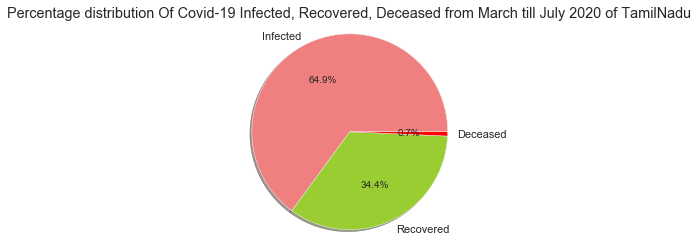

In [462]:
infected = sum(TamilNadu["Confirmed"])
deceased = sum(TamilNadu["Deaths"])
recovered = sum(TamilNadu["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19 Infected, Recovered, Deceased from March till July 2020 of TamilNadu")
plt.axis('equal')
plt.show()

## Delhi analysis

In [464]:
Delhi.Date[0:125:30]

34      02/03/20
535     01/04/20
1485    01/05/20
2494    31/05/20
3575    30/06/20
Name: Date, dtype: object

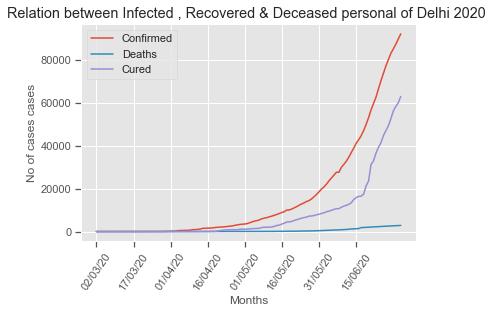

In [466]:
plt.style.use('ggplot')
plt.plot(Delhi.Date,Delhi.Confirmed,label="Confirmed")
plt.plot(Delhi.Date,Delhi.Deaths,label="Deaths")
plt.plot(Delhi.Date,Delhi.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of Delhi 2020 ")
plt.xlabel("Months")
plt.ylabel("No of cases cases")
plt.xticks(Delhi.Date[0:110:15].tolist(),rotation=55)
plt.legend()
plt.show()

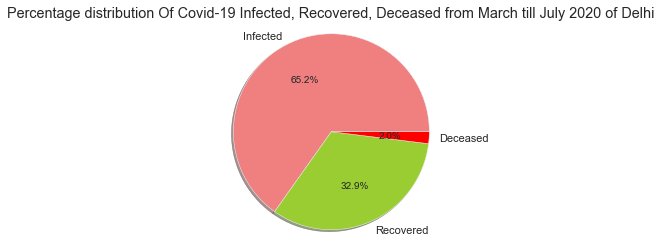

In [467]:
infected = sum(Delhi["Confirmed"])
deceased = sum(Delhi["Deaths"])
recovered = sum(Delhi["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19 Infected, Recovered, Deceased from March till July 2020 of Delhi")
plt.axis('equal')
plt.show()

## Gujarat analysis

In [470]:
Gujarat.Date[0:107:30]

231     20/03/20
1100    19/04/20
2077    19/05/20
3145    18/06/20
Name: Date, dtype: object

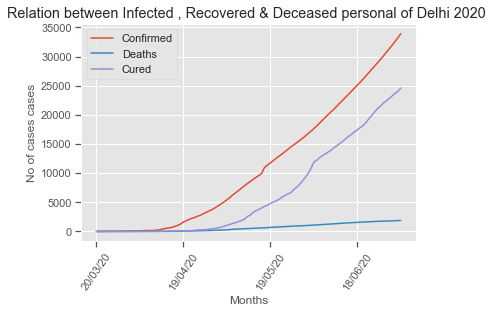

In [477]:
plt.style.use('ggplot')
plt.plot(Gujarat.Date,Gujarat.Confirmed,label="Confirmed")
plt.plot(Gujarat.Date,Gujarat.Deaths,label="Deaths")
plt.plot(Gujarat.Date,Gujarat.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of Delhi 2020 ")
plt.xlabel("Months")
plt.ylabel("No of cases cases")
plt.xticks(Gujarat.Date[0:107:30].tolist(),rotation=55)
plt.legend()
plt.show()

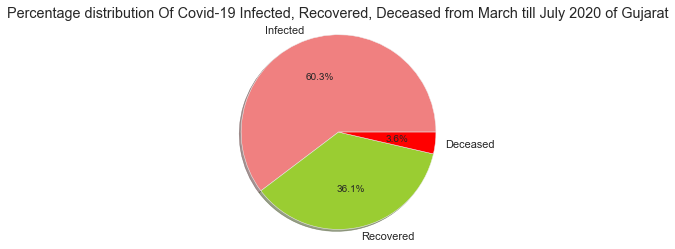

In [478]:
infected = sum(Gujarat["Confirmed"])
deceased = sum(Gujarat["Deaths"])
recovered = sum(Gujarat["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19 Infected, Recovered, Deceased from March till July 2020 of Gujarat")
plt.axis('equal')
plt.show()

## UttarPradesh analysis

In [482]:
UttarPradesh.Date[0:123:30]

39      04/03/20
615     03/04/20
1572    03/05/20
2591    02/06/20
3672    02/07/20
Name: Date, dtype: object

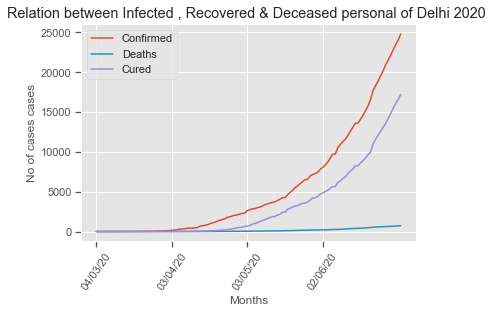

In [483]:
plt.style.use('ggplot')
plt.plot(UttarPradesh.Date,UttarPradesh.Confirmed,label="Confirmed")
plt.plot(UttarPradesh.Date,UttarPradesh.Deaths,label="Deaths")
plt.plot(UttarPradesh.Date,UttarPradesh.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of Delhi 2020 ")
plt.xlabel("Months")
plt.ylabel("No of cases cases")
plt.xticks(UttarPradesh.Date[0:107:30].tolist(),rotation=55)
plt.legend()
plt.show()

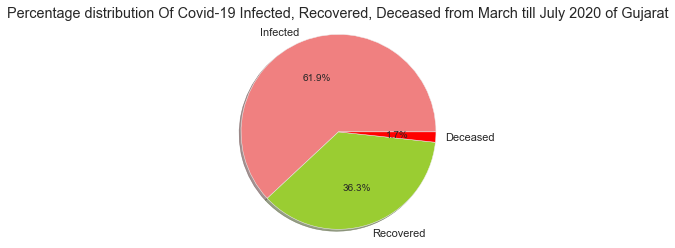

In [484]:
infected = sum(UttarPradesh["Confirmed"])
deceased = sum(UttarPradesh["Deaths"])
recovered = sum(UttarPradesh["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19 Infected, Recovered, Deceased from March till July 2020 of Gujarat")
plt.axis('equal')
plt.show()

## Rajasthan analysis

In [490]:
Rajasthan.Date[0:124:30]

36      03/03/20
581     02/04/20
1535    02/05/20
2549    01/06/20
3630    01/07/20
Name: Date, dtype: object

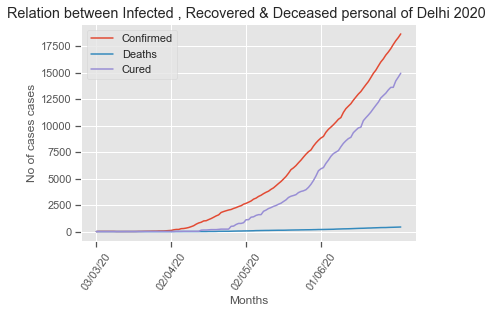

In [491]:
plt.style.use('ggplot')
plt.plot(Rajasthan.Date,Rajasthan.Confirmed,label="Confirmed")
plt.plot(Rajasthan.Date,Rajasthan.Deaths,label="Deaths")
plt.plot(Rajasthan.Date,Rajasthan.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of Delhi 2020 ")
plt.xlabel("Months")
plt.ylabel("No of cases cases")
plt.xticks(Rajasthan.Date[0:107:30].tolist(),rotation=55)
plt.legend()
plt.show()

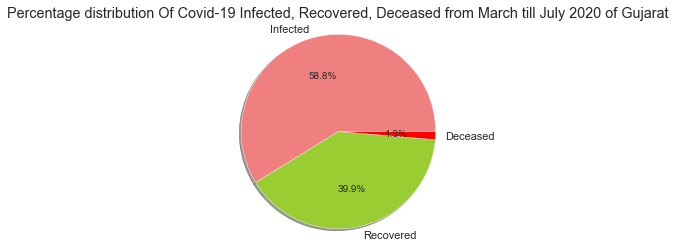

In [492]:
infected = sum(Rajasthan["Confirmed"])
deceased = sum(Rajasthan["Deaths"])
recovered = sum(Rajasthan["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19 Infected, Recovered, Deceased from March till July 2020 of Gujarat")
plt.axis('equal')
plt.show()

## Wasn't able to perform CMR & RR due to RuntimeWarning: invalid value encountered in long_scalars even after converting to ndarry

## B. Correlation heatmap for various parameters


In [267]:
data['Mortality Rate'] = (data['Confirmed']/data['Deaths']).round(2)

In [269]:
data['Recovery Rate'] = (data['Cured']/data['Confirmed']).round(2)

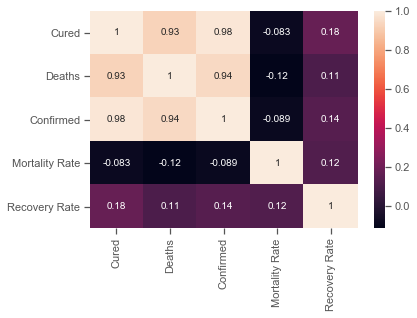

In [270]:
sns.heatmap(data.corr(),annot=True)

## C. Build a model for predicting the confirmed and recovered on any dates past 15th July 2020


In [296]:
data1 = pd.read_csv('state.csv')

In [297]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    357 non-null    object
 1   Status  357 non-null    object
 2   TT      357 non-null    int64 
 3   AN      357 non-null    int64 
 4   AP      357 non-null    int64 
 5   AR      357 non-null    int64 
 6   AS      357 non-null    int64 
 7   BR      357 non-null    int64 
 8   CH      357 non-null    int64 
 9   CT      357 non-null    int64 
 10  DN      357 non-null    int64 
 11  DD      357 non-null    int64 
 12  DL      357 non-null    int64 
 13  GA      357 non-null    int64 
 14  GJ      357 non-null    int64 
 15  HR      357 non-null    int64 
 16  HP      357 non-null    int64 
 17  JK      357 non-null    int64 
 18  JH      357 non-null    int64 
 19  KA      357 non-null    int64 
 20  KL      357 non-null    int64 
 21  LA      357 non-null    int64 
 22  LD      357 non-null    in

In [298]:
data1.head(3)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
data1['Status'].unique()

array(['Confirmed', 'Recovered', 'Deceased'], dtype=object)

In [300]:
data1['Status'] = data1['Status'].replace("Confirmed", "0")
data1['Status'] = data1['Status'].replace("Recovered", "1")
data1['Status'] = data1['Status'].replace("Deceased", "2")

In [301]:
data1.head(3)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,0,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,1,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
data1.drop(columns=['Date'],inplace=True)

### separating Independent & dependent col

In [303]:
data1.columns 

Index(['Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [304]:
x = data1[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']] .values  
x[0:5]

array([[81,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0, 14,  0,  2,
         0,  6, 19,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  1,  3,  0,
         1,  1,  0, 12,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  4,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  2,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  1,  0,  0,  0,  0,  0]])

In [305]:
y = data1['Status'].values
y[0:5]

array(['0', '1', '2', '0', '1'], dtype=object)

In [306]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]  #standardization of data

array([[-0.62373706, -0.32453617, -0.44654347, -0.3046312 , -0.44017774,
        -0.59830945, -0.38957995, -0.51589193, -0.33299692,  0.        ,
        -0.53463575, -0.41722886, -0.84237264, -0.47057974, -0.56162429,
        -0.56587247, -0.49814426, -0.37589416, -0.19824055, -0.27835396,
         0.        , -0.86965095, -0.63352822, -0.38689116, -0.15703169,
        -0.21667963, -0.32872659, -0.51703245, -0.38309254, -0.45232962,
        -0.77834302, -0.18133977, -0.56689176, -0.39150599, -0.40630124,
        -0.5969535 , -0.5071805 , -0.60619091, -0.05991803],
       [-0.63577367, -0.32453617, -0.45067867, -0.3046312 , -0.44017774,
        -0.59830945, -0.38957995, -0.51589193, -0.33299692,  0.        ,
        -0.54051953, -0.41722886, -0.84237264, -0.54864266, -0.56162429,
        -0.59259599, -0.49814426, -0.39352771, -0.48020021, -0.27835396,
         0.        , -0.86965095, -0.64194987, -0.38689116, -0.15703169,
        -0.21667963, -0.32872659, -0.51703245, -0.38309254, -0.

In [329]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape) #trainning model and predicting 

Train set: (285, 39) (285,)
Test set: (72, 39) (72,)


In [330]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [331]:
yhat = neigh.predict(x_test)  
yhat[0:5]

array(['2', '2', '2', '2', '1'], dtype=object)

In [337]:
score = neigh.score(x_test, y_test)
print("Model accuracy is {}".format(score.round(2))) #model accuracy score

Model accuracy is 0.69


## D. Build a classifier for severity gauging

In [392]:
data2 = pd.read_csv('PAML_COVID_Dataset Sheet1.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3135 non-null   object
 1   Time                      3135 non-null   object
 2   State/UnionTerritory      3135 non-null   object
 3   ConfirmedIndianNational   3135 non-null   object
 4   Gender                    3135 non-null   object
 5   ConfirmedForeignNational  3135 non-null   object
 6   Age                       3135 non-null   int64 
 7   Serious symptoms          3135 non-null   object
 8   Less common symptoms      3135 non-null   object
 9   Most common symptoms      3135 non-null   object
 10  Severity                  3135 non-null   object
 11  Patient_Status            3135 non-null   object
dtypes: int64(1), object(11)
memory usage: 294.0+ KB


In [393]:
data2.drop(columns=["Date","Time"],inplace=True)

In [394]:
data2.columns

Index(['State/UnionTerritory', 'ConfirmedIndianNational', 'Gender ',
       'ConfirmedForeignNational', 'Age ', 'Serious symptoms',
       'Less common symptoms', 'Most common symptoms', 'Severity',
       'Patient_Status '],
      dtype='object')

In [401]:
data2.head(4) #Patient_Status col is the end vales need to patient 

,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,Kerala,1,Male,0,77,loss of speech or movement,"a rash on skin, or discolouration of fingers o...",dry cough,Mild,flu
1,Kerala,1,Female,0,23,chest pain or pressure,loss of taste or smell,dry cough,Seviour,Covid
2,Kerala,2,Male,0,90,difficulty breathing or shortness of breath,conjunctivitis,tiredness,Seviour,Covid
3,Kerala,3,Female,0,18,difficulty breathing or shortness of breath,diarrhoea,fever,Seviour,Covid


In [399]:
labelEncoder = LabelEncoder()
x[:,0] = labelEncoder.fit_transform(x[:,0])
x[:,2] = labelEncoder.fit_transform(x[:,2])
x[:,5] = labelEncoder.fit_transform(x[:,5])
x[:,6] = labelEncoder.fit_transform(x[:,6]) #converting string into numberic data to perform ML
x[:,7] = labelEncoder.fit_transform(x[:,7])
x[:,8] = labelEncoder.fit_transform(x[:,8])
x[:,9] = labelEncoder.fit_transform(x[:,9])


In [400]:
x1 = pd.DataFrame(x)
x1

,0,1,2,3,4,5,6,7,8,9
0,19,1,1,0,77,2,0,0,0,1
1,19,1,0,0,23,0,5,0,2,0
2,19,2,1,0,90,1,2,2,2,0
3,19,3,0,0,18,1,3,1,2,0
4,19,3,1,0,24,0,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...
3130,35,-,1,-,66,0,4,1,1,0
3131,38,-,1,-,73,2,5,0,0,0
3132,37,-,1,-,18,2,2,0,2,0
3133,39,-,1,-,79,0,4,1,2,0


In [407]:
x1[1] = x1[1].replace('-',0)
x1[3] = x1[3].replace('-',0) #replacing - with 0

### separating Independent & dependent col

In [408]:
x = x1[[0,1,2,3,4,5,6,7,8]] .values  
x[0:5]

array([[19, '1', 1, '0', 77, 2, 0, 0, 0],
       [19, '1', 0, '0', 23, 0, 5, 0, 2],
       [19, '2', 1, '0', 90, 1, 2, 2, 2],
       [19, '3', 0, '0', 18, 1, 3, 1, 2],
       [19, '3', 1, '0', 24, 0, 3, 2, 2]], dtype=object)

In [416]:
y = x1[9].values
y=y.astype('int') #converting object into int for calculation
y[0:5]

array([1, 0, 0, 0, 0])

In [423]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5] #Standardization of data

array([[-0.05521939, -0.07996629,  0.9971333 , -0.14722546,  0.89554084,
         1.24173161, -1.5043959 , -1.20859338, -1.24718755],
       [-0.05521939, -0.07996629, -1.00287495, -0.14722546, -1.05297353,
        -1.22442525,  0.96253639, -1.20859338,  1.22980514],
       [-0.05521939,  0.02898387,  0.9971333 , -0.14722546,  1.36462764,
         0.00865318, -0.51762299,  1.24062462,  1.22980514],
       [-0.05521939,  0.13793403, -1.00287495, -0.14722546, -1.23339153,
         0.00865318, -0.02423653,  0.01601562,  1.22980514],
       [-0.05521939,  0.13793403,  0.9971333 , -0.14722546, -1.01688993,
        -1.22442525, -0.02423653,  1.24062462,  1.22980514]])

In [425]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)  #splitting data into train & test data

Train set: (2508, 9) (2508,)
Test set: (627, 9) (627,)


In [430]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)  #trainning model and predicting 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [431]:
yhat = knn.predict(x_test)
yhat[0:5]

array([1, 1, 1, 0, 1])

In [438]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)) #accuracy score for test data & train data 

Train set Accuracy:  0.9996012759170654
Test set Accuracy:  0.48165869218500795


### Dataset sources: https://www.covid19india.org & http://kaggle.com

## By Vigneshwaram